# Aim is to develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.

In [1]:
#Our target is a binary output which is yes for pass and no for fail

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('student-data.csv')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
data.shape

(395, 31)

In [6]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [8]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [11]:
#checking for balanced dataset
data['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [12]:
#feature and target columns
y=data['passed']
x=data.drop(['passed'],axis=1)

# Preprocessing

In [13]:
#Used label encoding for some of the columns

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_en={}
Binary_feat=['school','sex','address','famsize','Pstatus',
             'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for i in Binary_feat:
    label_en[i] = LabelEncoder()
    x[i] = label_en[i].fit_transform(x[i])

In [16]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [17]:
#for nominal features use one hot encoding
x=pd.get_dummies(x)

In [18]:
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [19]:
x.shape

(395, 43)

In [20]:
x.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [37]:
#splitting the dataset

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [39]:
x_train.shape

(316, 43)

In [40]:
x_test.shape

(79, 43)

# Training the model

# LOGISTIC REGRESSION

In [41]:
import time
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_predict=logit_model.predict(x_test)

end_time = time.time()

In [42]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [43]:
accuracy_score(y_test,y_predict)

0.7088607594936709

In [44]:
confusion_matrix(y_test,y_predict)

array([[ 9, 18],
       [ 5, 47]], dtype=int64)

In [45]:
time_taken = end_time - start_time

In [46]:
time_taken

0.036025047302246094

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
start_time = time.time()
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_predict=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
end_time = time.time()   

In [54]:
acc_values

[0.5569620253164557,
 0.5063291139240507,
 0.5949367088607594,
 0.6329113924050633,
 0.6708860759493671,
 0.6455696202531646,
 0.6835443037974683,
 0.6835443037974683,
 0.6582278481012658,
 0.6582278481012658,
 0.6455696202531646,
 0.6329113924050633]

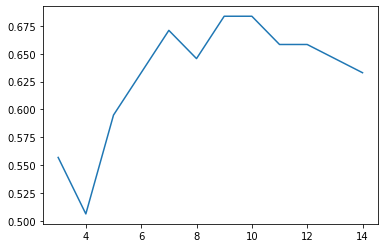

In [55]:
plt.plot(neighbors,acc_values,)

In [56]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
accuracy_score(y_test,y_predict)

0.6329113924050633

In [57]:
confusion_matrix(y_test,y_predict)

array([[ 1, 26],
       [ 3, 49]], dtype=int64)

In [58]:
time_taken = end_time - start_time
time_taken

0.10877776145935059

# DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
start_time = time.time()
dt_model=DecisionTreeClassifier()

In [74]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
y_predict=dt_model.predict(x_test)
end_time=time.time()

In [76]:
accuracy_score(y_test,y_predict)

0.6582278481012658

In [77]:
confusion_matrix(y_test,y_predict)

array([[ 9, 18],
       [ 9, 43]], dtype=int64)

In [78]:
time_taken = end_time - start_time
time_taken

0.9684593677520752

# SVM

In [83]:
from sklearn.svm import SVC

In [84]:
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)
end_time = time.time()

In [85]:
accuracy_score(y_test,y_predict)

0.6582278481012658

In [86]:
time_taken = end_time - start_time
time_taken

0.016008853912353516

# GRADIENTBOOSTINGCLASSIFIER

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
start_time=time.time()
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_predict=GBC.predict(x_test)
end_time=time.time()

In [96]:
accuracy_score(y_test,y_predict)

0.7088607594936709

In [97]:
confusion_matrix(y_test,y_predict)

array([[10, 17],
       [ 6, 46]], dtype=int64)

In [98]:
time_taken = end_time - start_time
time_taken

0.22464990615844727

In [ ]:
#The most accurate model is Logistic regression  and the time taken is also less